In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Data Loading

In [1]:
path = '/Users/melawai.it/Documents/Work/Hacktiv8/Assignment Python 3/bank+marketing (1)/bank-additional/bank-additional-full.csv'

In [5]:
df_bank_ori = pd.read_csv(path, sep=';')

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
df_bank_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
df_bank_ori.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [12]:
df_bank_ori.shape

(41188, 21)

In [13]:
df_bank_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
df_bank_ori['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

## Data Cleaning

In [ ]:
print("Duplicated data :", df_bank_ori.duplicated().sum())

In [19]:
df_bank_ori.drop_duplicates(inplace=True)

In [20]:
print("Duplicated data :", df_bank_ori.duplicated().sum())

Duplicated data : 0


In [21]:
print('Missing values per columns :\n', df_bank_ori.isna().sum())

Missing values per columns :
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [59]:
df_clean = df_bank_ori.copy()

In [61]:
print("'defalut' column : ", df_clean["default"].unique())
print("'housing' column : ", df_clean["housing"].unique())
print("'loan' column : ", df_clean["loan"].unique())

'defalut' column :  ['no' 'unknown' 'yes']
'housing' column :  ['no' 'yes' 'unknown']
'loan' column :  ['no' 'yes' 'unknown']


In [62]:
# encode 'default', 'housing', and 'loan' column, to 1 and 0 because 
# the values only yes or no
ports = { "yes":1, 
         "no":0,
         "unknown" : np.nan
        }

df_clean["default"] = df_clean["default"].map(ports)
df_clean["housing"] = df_clean["housing"].map(ports)
df_clean["loan"] = df_clean["loan"].map(ports)
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [66]:
df_clean["housing"].mode()

0    1.0
Name: housing, dtype: float64

In [67]:
df_clean["default"] = df_clean["default"].fillna(df_clean["default"].mode()[0])

In [68]:
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [69]:
df_clean["housing"] = df_clean["housing"].fillna(df_clean["housing"].mode()[0])
df_clean["loan"] = df_clean["loan"].fillna(df_clean["loan"].mode()[0])

# EDA

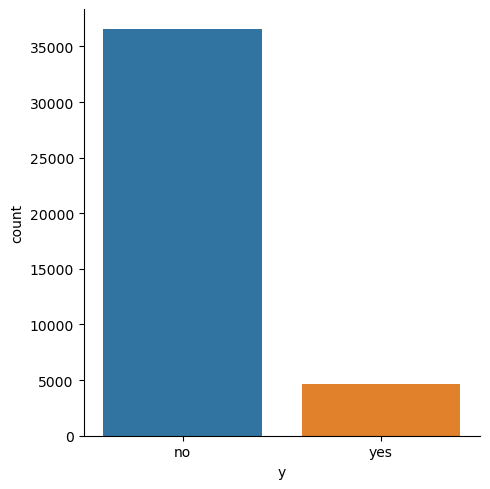

In [23]:
sns.catplot(x='y', data=df_bank_ori, kind='count')

In [25]:
# separating between numerical and categorical column
categorical = df_bank_ori.select_dtypes(include = ['object']).columns.tolist()
numeric = df_bank_ori.select_dtypes(include = ['int64', 'float64']).columns.tolist()

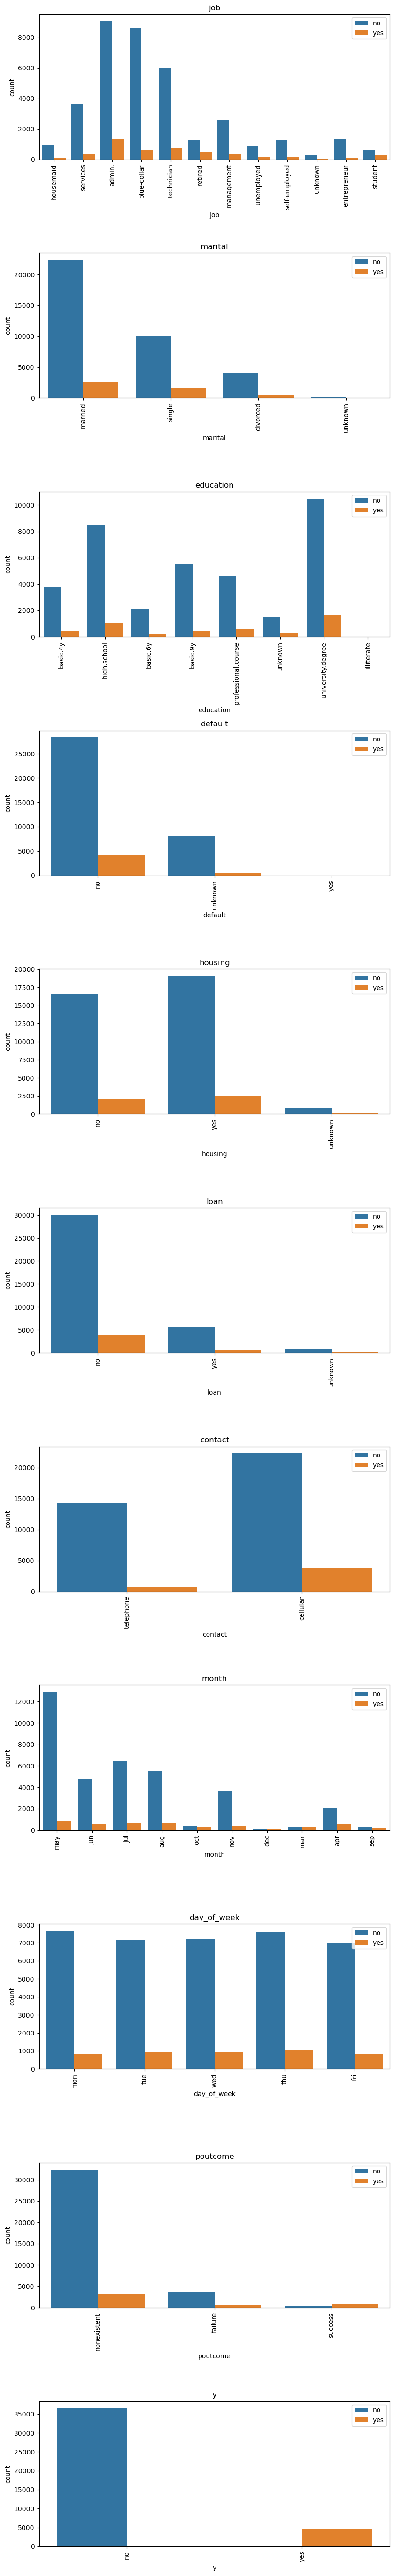

In [26]:
col=categorical

n_rows=len(col)
n_cols=1

fig,axis=plt.subplots(n_rows,figsize=(n_cols*8.5,n_rows*5))

for r in range(0,n_rows):
        i=r*n_cols
        ax=axis[r]
        sns.countplot(x=col[i],hue='y', data=df_bank_ori, ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')
        ax.tick_params(axis = 'x', labelrotation=90)

plt.tight_layout()

<Axes: ylabel='age'>

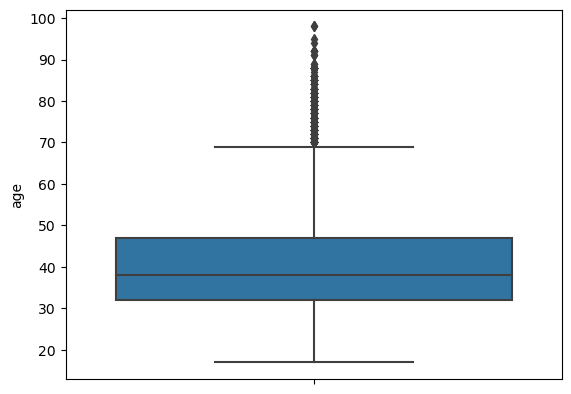

In [27]:
sns.boxplot(y='age', data=df_bank_ori)

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/melawai.it/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/melawai.it/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/melawai.it/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/melawai.it/anaconda3/lib/pyth

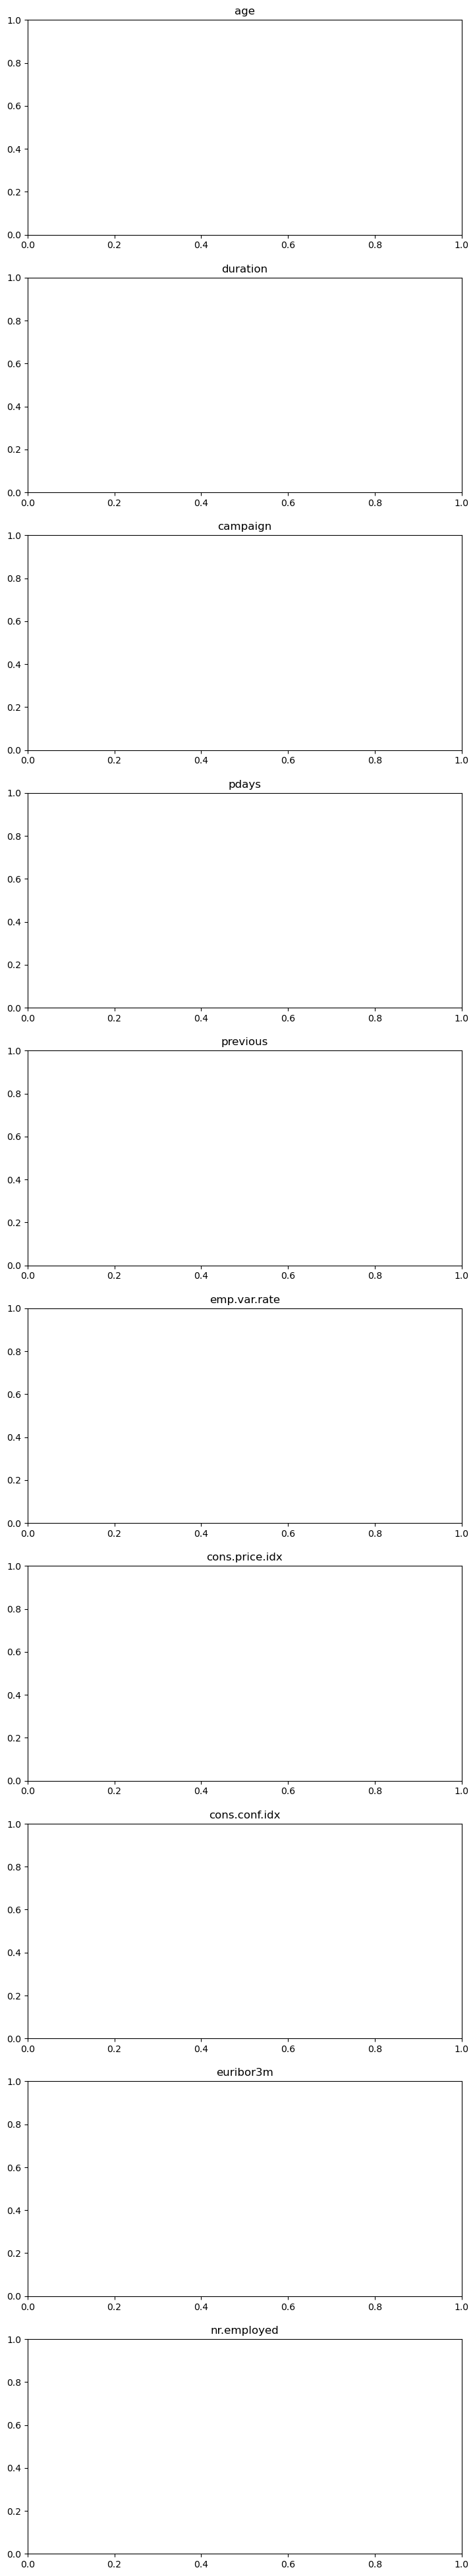

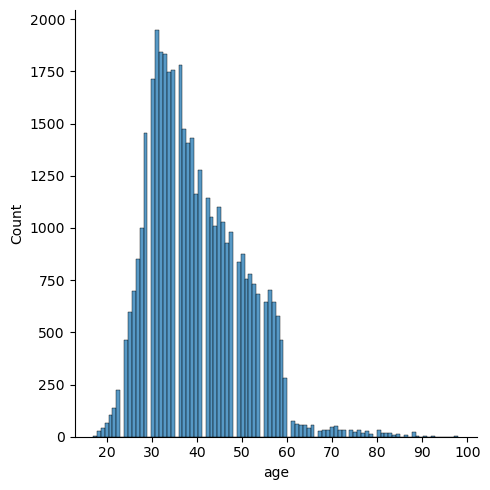

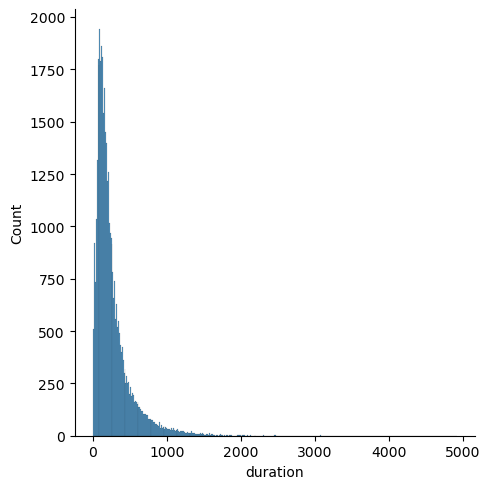

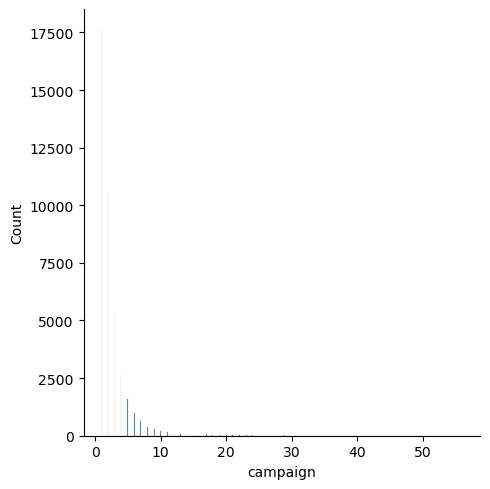

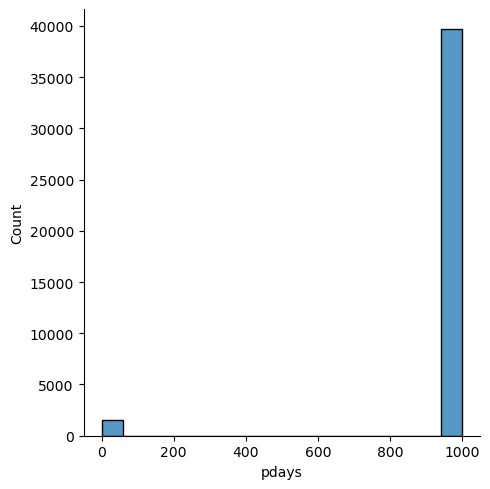

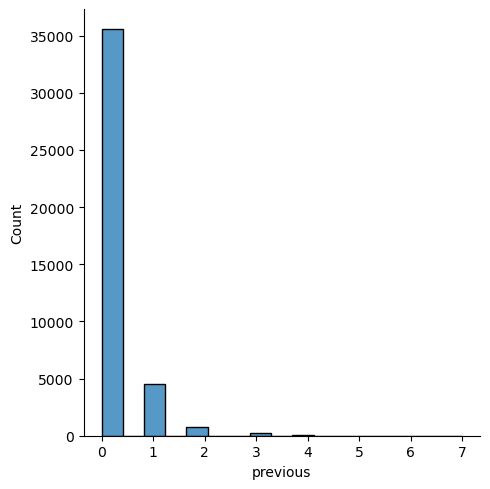

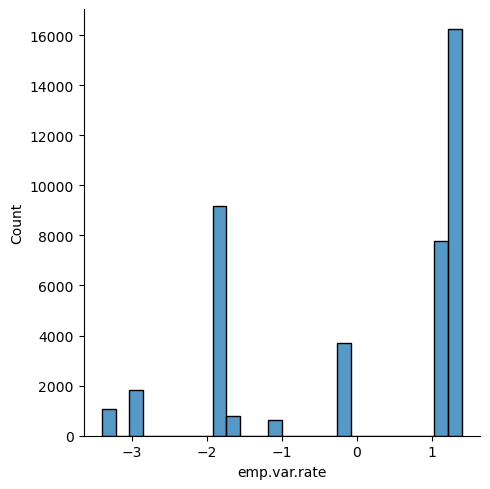

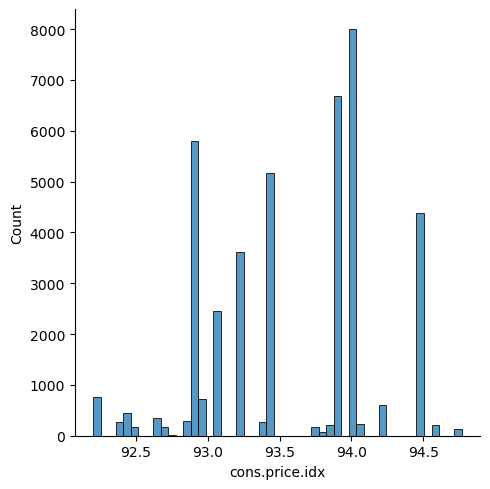

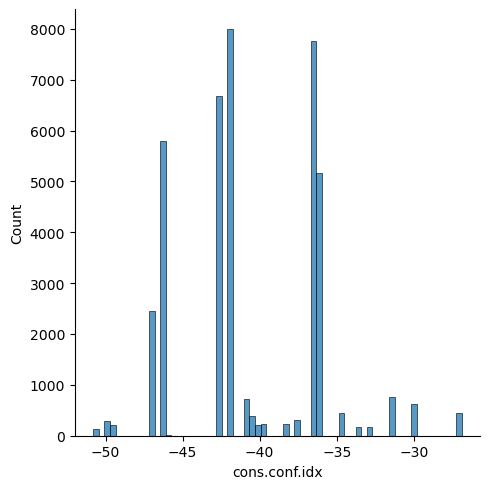

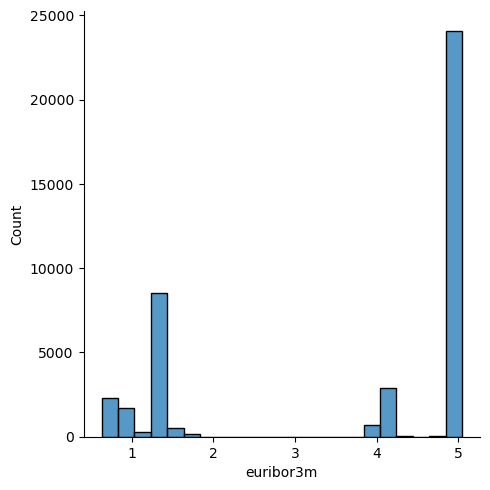

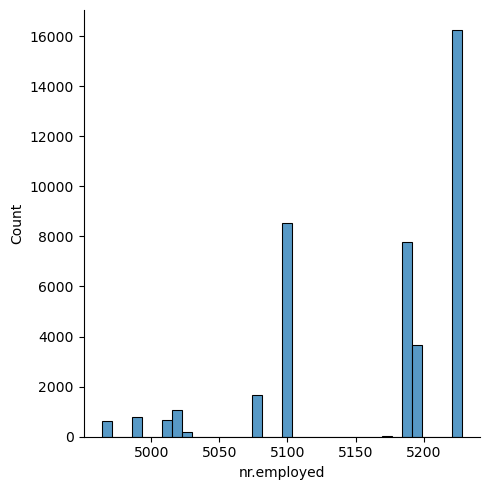

In [32]:
col=numeric

n_rows=len(col)
n_cols=1

fig,axis=plt.subplots(n_rows,figsize=(n_cols*8.5,n_rows*5))

for r in range(0,n_rows):
        i=r*n_cols
        ax=axis[r]
        sns.displot(x=col[i], data=df_bank_ori, ax=ax)
        ax.set_title(col[i])

plt.tight_layout()

In [33]:
features = ['age', 'education']

In [35]:
X = df_bank_ori[features]
y = df_bank_ori['y']

In [41]:
X = pd.get_dummies(X, columns=['education'])

In [43]:
X.drop('education_unknown', axis=1, inplace=True)

In [50]:
y = pd.get_dummies(y)

In [52]:
y = y['yes']

In [45]:
from imblearn.over_sampling import SMOTENC

smote = SMOTE()
X,y = smote.fit_resample(X,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/melawai.it/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [46]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.8825886352598349


# =================

In [71]:
df_sample = df_clean.sample(int(len(df_clean)*.2), random_state=42)

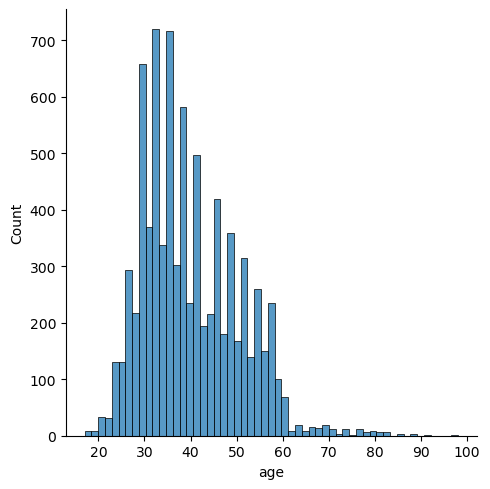

In [72]:
sns.displot(x='age', data=df_sample)